# Levy Processes

In general, Lévy processes have three components (Lévy or characteristic triplet):

* linear drift
* Brownian diffusion
* jumps.

You can define that process by explicitly giving its trend/volatility/jump components or you take a simple arithmetic Brownian motion 𝑋𝑡=𝜃𝑡+𝜎𝑊𝑡 and a Gamma process 𝛾𝑡. Then, the process 𝑋𝛾𝑡=𝜃𝛾𝑡+𝜎𝑊𝛾𝑡 is a variance gamma process. 

If you want a book on Lévy processes, I'd recommend `Financial Modelling with Jump Processes` from Cont and Tankov. It's extremely well written.

In [1]:
import numpy as np
import scipy as scp
import scipy.stats as ss
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import scipy.special as scps
from functools import partial
from scipy.optimize import minimize
from math import factorial

##  Merton Jump-Diffusion process

Equation:
$$ X_t = \mu{t} + \sigma{W_t} + \sum_{i=1}^{N_t}Y_i$$
where $N_t \sim Po(\lambda{t})$ is a Poisson random variable counting the jumps of $X_t$ in $[0, t]$ and
$$Y_i \sim \mathcal{N}(\alpha, \xi^2)$$

In [2]:
mu = 0.05  # drift
sig = 0.2  # diffusion coefficient
lam = 1.2  # jump activity
muJ = 0.15  # jump mean size
sigJ = 0.5  # jump std deviation
T = 2  # terminal time
N = 1_000_000  # number of random variables

In [3]:
np.random.seed(seed=42)
W = ss.norm.rvs(0, 1, N)  # The normal RV vector
P = ss.poisson.rvs(lam * T, size=N)  # Poisson random vector
Jumps = np.asarray([ss.norm.rvs(muJ, sigJ, i).sum() for i in P])  # Jumps vector
X_T = mu * T + np.sqrt(T) * sig * W + Jumps  # Merton process

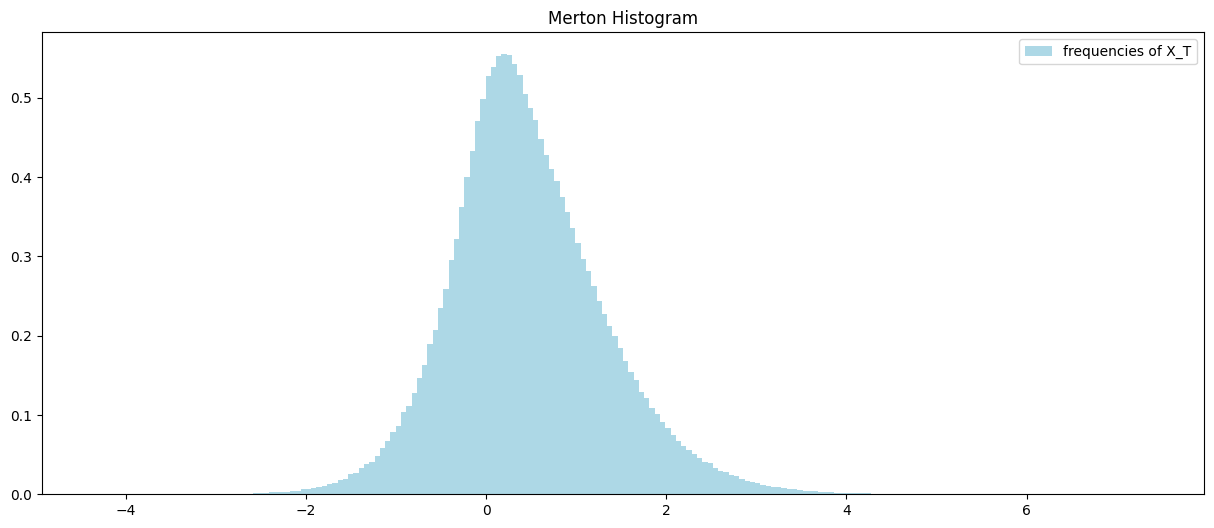

In [4]:
x = np.linspace(X_T.min(), X_T.max(), 500)
y = np.linspace(-3, 5, 50)

plt.figure(figsize=(15, 6))
# plt.plot(x, Merton_density(x, T, mu, sig, lam, muJ, sigJ), color="r", label="Merton density")
# plt.plot(y, [Gil_Pelaez_pdf(i, cf_M_b, np.inf) for i in y], "p", label="Fourier inversion")
plt.hist(X_T, density=True, bins=200, facecolor="LightBlue", label="frequencies of X_T")
plt.legend()
plt.title("Merton Histogram")
plt.show()

## Resources

* https://arxiv.org/pdf/0804.0482.pdf
* https://github.com/cantaro86/Financial-Models-Numerical-Methods/blob/master/1.5%20SDE%20-%20L%C3%A9vy%20processes.ipynb
* https://quant.stackexchange.com/questions/54082/which-process-is-the-most-commonly-used-for-modeling-stock-prices
* https://www.google.com/books/edition/Financial_Modelling_with_Jump_Processes/tDJ6AgAAQBAJ?hl=en&gbpv=1
* https://www.stats.ox.ac.uk/~winkel/lp1.pdf Introduction to L´evy processes
* L´evy models in finance https://www.stat.rice.edu/~jrojo/PASI/lectures/Ernesto%202.pdf